In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [3]:
# 1. Setup & Style
# Set a professional theme
sns.set_theme(style="whitegrid", context="talk") 
# Custom color palette (Amazon-ish colors: Dark Blue, Orange)
custom_palette = ["#232F3E", "#FF9900"] 

# Load Data
df = pd.read_csv('amazon_products_sales_data_cleaned.csv')

In [4]:
# Prep Data: Convert booleans to readable text for the charts
df['Status'] = df['is_best_seller'].apply(lambda x: 'Best Seller' if x else 'Regular Product')
df['Sponsor_Label'] = df['is_sponsored'].apply(lambda x: 'Sponsored' if x else 'Organic')

C:\Users\DELL\AppData\Local\Temp\ipykernel_1504\2717744367.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=plot_df, x='current/discounted_price', y='Status',


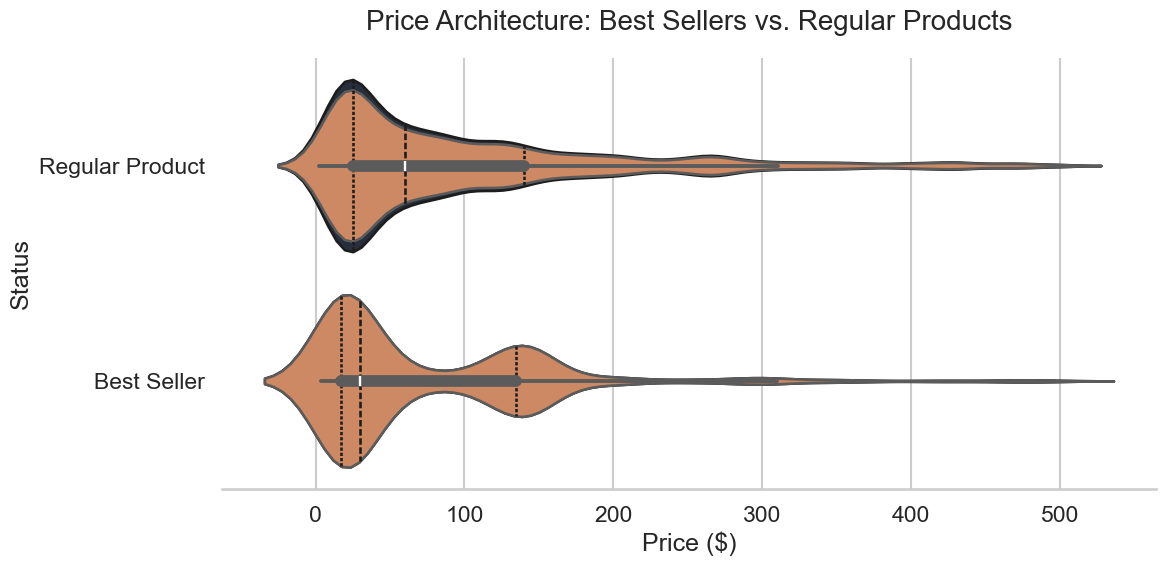

In [6]:

# Filter extreme outliers for cleaner visuals (e.g., prices > $500)
plot_df = df[df['current/discounted_price'] < 500].copy()

# --- VISUAL 1: The "Golden Price" (Violin Plot) ---
plt.figure(figsize=(12, 6))
ax = sns.violinplot(data=plot_df, x='current/discounted_price', y='Status', 
                    palette=custom_palette, inner="quartile", orient="h")
ax.set_title('Price Architecture: Best Sellers vs. Regular Products', fontsize=20, pad=20)
ax.set_xlabel('Price ($)')
ax.set_ylabel('')
sns.despine(left=True)
ax = sns.violinplot(data=plot_df, x='current/discounted_price', y='Status'),
plt.tight_layout()
plt.savefig('viz1_price_violin.png', dpi=300)
plt.show()


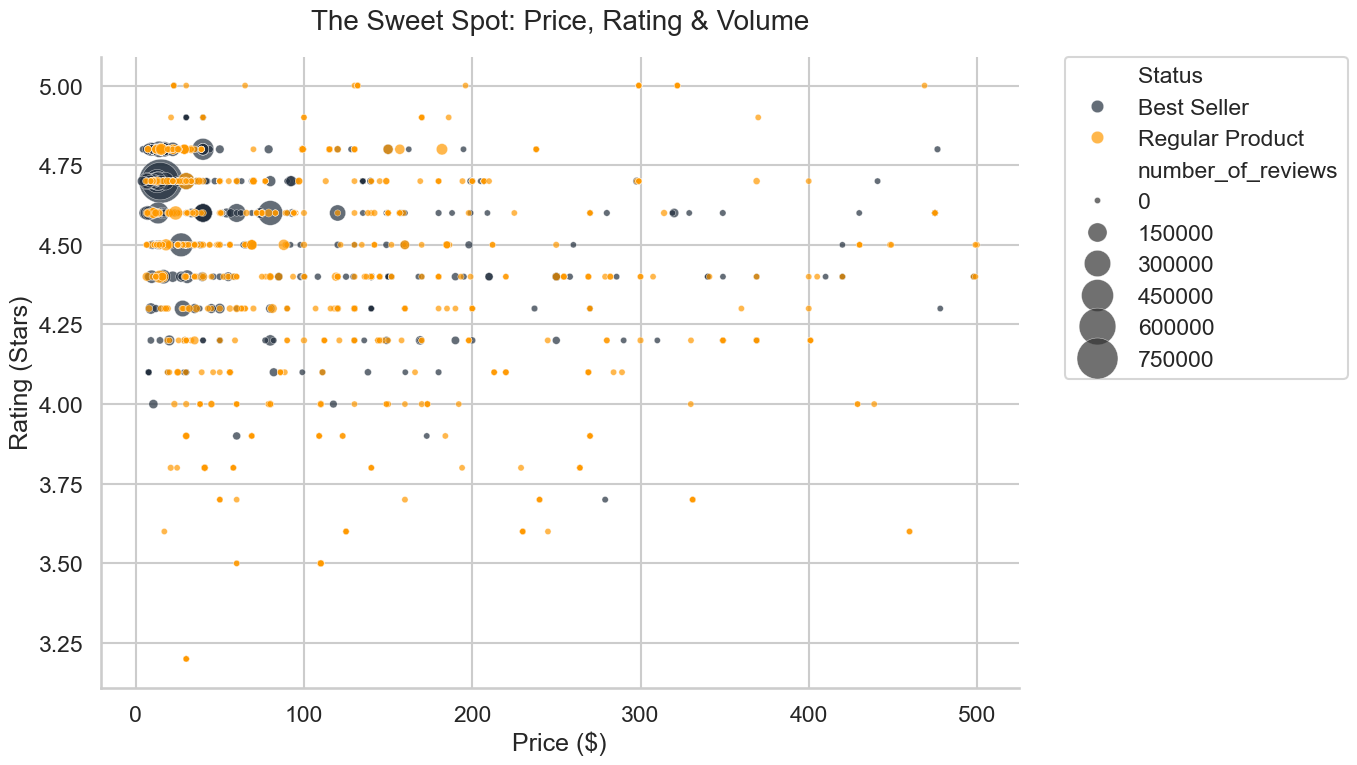

In [7]:
# --- VISUAL 2: The "Success Engine" (Bubble Chart) ---
# We sample 2000 points to avoid overplotting, but keep all Best Sellers
best_sellers = plot_df[plot_df['is_best_seller'] == 1]
regular = plot_df[plot_df['is_best_seller'] == 0].sample(n=1000, random_state=42)
bubble_df = pd.concat([best_sellers, regular])

plt.figure(figsize=(14, 8))
# Scatterplot: X=Price, Y=Rating, Size=Reviews, Hue=Status
ax2 = sns.scatterplot(data=bubble_df, x='current/discounted_price', y='rating', 
                      size='number_of_reviews', sizes=(20, 1000), 
                      hue='Status', palette=custom_palette, alpha=0.7, edgecolor='w')

ax2.set_title('The Sweet Spot: Price, Rating & Volume', fontsize=20, pad=20)
ax2.set_xlabel('Price ($)')
ax2.set_ylabel('Rating (Stars)')
# Move legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.tight_layout()
plt.savefig('viz2_bubble_chart.png', dpi=300)
plt.show()

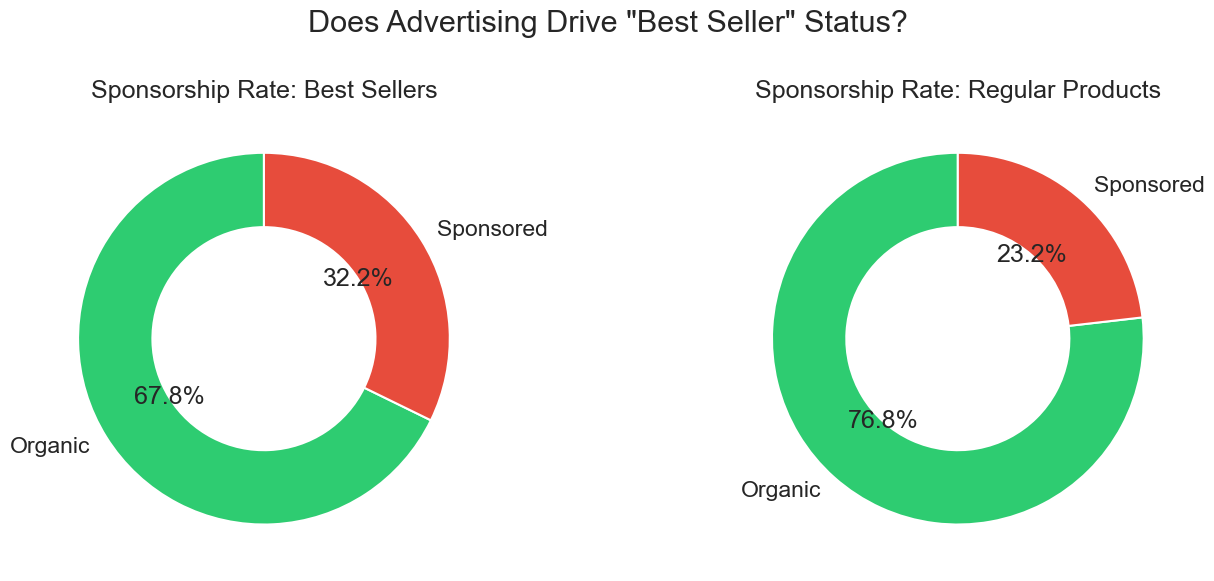

In [8]:
# --- VISUAL 3: The "Pay-to-Play" Factor (Nested Donut) ---
# Calculate proportions
bs_sponsored = plot_df[plot_df['is_best_seller']==1]['is_sponsored'].value_counts(normalize=True)
reg_sponsored = plot_df[plot_df['is_best_seller']==0]['is_sponsored'].value_counts(normalize=True)

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(14, 6))

# Best Seller Pie
ax3.pie(bs_sponsored, labels=['Organic', 'Sponsored'], autopct='%1.1f%%', 
        colors=['#2ecc71', '#e74c3c'], startangle=90, wedgeprops=dict(width=0.4))
ax3.set_title('Sponsorship Rate: Best Sellers')

# Regular Product Pie
ax4.pie(reg_sponsored, labels=['Organic', 'Sponsored'], autopct='%1.1f%%', 
        colors=['#2ecc71', '#e74c3c'], startangle=90, wedgeprops=dict(width=0.4))
ax4.set_title('Sponsorship Rate: Regular Products')

plt.suptitle('Does Advertising Drive "Best Seller" Status?', fontsize=22)
plt.tight_layout()
plt.savefig('viz3_sponsorship_donut.png', dpi=300)
plt.show()